In [1]:
#multi_agent.ipynb
#
#by Joe Hahn
#jmh.datasciences@gmail.com
#12 February 2018
#
#This uses Q-learning on multiple agents to demonstrate something...

In [2]:
#game settings
N_agents = 5                #number of agents
N_buckets = 20               #number of buckets
max_turns = 100             #max number of moves in single game
turn = 0                     #starting turn
rn_seed = 14                 #seed for random number generator

In [3]:
#import game
from multi_agent import *
import time
time_start = time.time()

In [4]:
#import plotting libraries
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.5, font='DejaVu Sans')

In [5]:
#initialize system
environment = initialize_environment(rn_seed, max_turns, N_buckets, N_agents)
print 'environment = ', environment
state = initialize_state(environment)
print 'state = ', state
reward, bucket_value = get_reward(state)
print 'reward = ', reward
print 'bucket_value = ', bucket_value
state_vector = state2vector(state, environment)
print 'state_vector = ', state_vector
game_state = get_game_state(turn, environment)
print 'game_state = ', game_state

environment =  {'max_turns': 100, 'rn_seed': 14, 'N_agents': 5, 'bucket_params': {'p0': array([ 0.        ,  0.00052632,  0.00105263,  0.00157895,  0.00210526,
        0.00263158,  0.00315789,  0.00368421,  0.00421053,  0.00473684,
        0.00526316,  0.00578947,  0.00631579,  0.00684211,  0.00736842,
        0.00789474,  0.00842105,  0.00894737,  0.00947368,  0.01      ]), 'sigma': array([ 0.        ,  0.00526316,  0.01052632,  0.01578947,  0.02105263,
        0.02631579,  0.03157895,  0.03684211,  0.04210526,  0.04736842,
        0.05263158,  0.05789474,  0.06315789,  0.06842105,  0.07368421,
        0.07894737,  0.08421053,  0.08947368,  0.09473684,  0.1       ])}, 'N_buckets': 20}
state =  {'agent_value': array([ 1.,  1.,  1.,  1.,  1.]), 'previous_bucket_productivity': array([ 0.        , -0.00369165, -0.01807678,  0.01337896,  0.00913855,
       -0.05796713, -0.0007253 , -0.02104404, -0.03497174, -0.05455436,
        0.03861921,  0.07899069,  0.06569688,  0.08239067, -0.0843097 

In [6]:
#illustrate moving an agent
locations = np.array([4, 3, 2, 1, 0])
state_moved = move_agent(state, locations)
print 'locations = ', locations
print 'state_moved = ', state_moved
state_next = update_state(state_moved, bucket_value, environment)
print 'state_next = ', state_next
state_vector_next = state2vector(state_next, environment)
#print 'state_vector_next = ', state_vector_next
#reward_next, bucket_value = get_reward(state_next)
#print 'reward_next = ', reward_next

locations =  [4 3 2 1 0]
state_moved =  {'agent_value': array([ 1.,  1.,  1.,  1.,  1.]), 'previous_bucket_productivity': array([ 0.        , -0.00369165, -0.01807678,  0.01337896,  0.00913855,
       -0.05796713, -0.0007253 , -0.02104404, -0.03497174, -0.05455436,
        0.03861921,  0.07899069,  0.06569688,  0.08239067, -0.0843097 ,
       -0.00446699,  0.06609592, -0.04146798,  0.07466153,  0.02137711]), 'agent_locations': array([4, 3, 2, 1, 0]), 'bucket_productivity': array([ 0.        ,  0.00084203, -0.00178013,  0.01216744, -0.03220457,
       -0.01056587, -0.00267959, -0.01465094, -0.04897467, -0.05864246,
       -0.06629436, -0.1437698 , -0.00879236,  0.02995888,  0.19498892,
       -0.00236   , -0.08043367, -0.05873901,  0.00596581,  0.0359571 ])}
state_next =  {'agent_value': array([ 0.99120764,  1.19498892,  0.98943413,  0.91956633,  1.00596581]), 'previous_bucket_productivity': array([ 0.        ,  0.00084203, -0.00178013,  0.01216744, -0.03220457,
       -0.01056587, -0.0

In [7]:
#play 1 game of randomly-moving agents and stash bucket rewards in dataframe
turn = 0
strategy = 'random'
memories = play_one_game(environment, turn, strategy)
game_history = memories2timeseries(memories, environment)
print 'number of memories generated during 1 game = ', len(memories)
game_history.tail()

number of memories generated during 1 game =  100


,turn,reward,agent_value_0,agent_value_1,agent_value_2,agent_value_3,agent_value_4
95,95,6.403228,1.005358,1.833980,0.770588,0.449870,2.590276
96,96,6.455782,0.983255,1.806610,0.765429,0.449870,2.398064
97,97,6.438524,0.936627,1.805820,0.866904,0.447996,2.398435
98,98,6.005097,0.976463,1.792556,0.860536,0.428150,2.380819
99,99,5.977505,1.016850,1.603537,0.901340,0.378522,2.104848


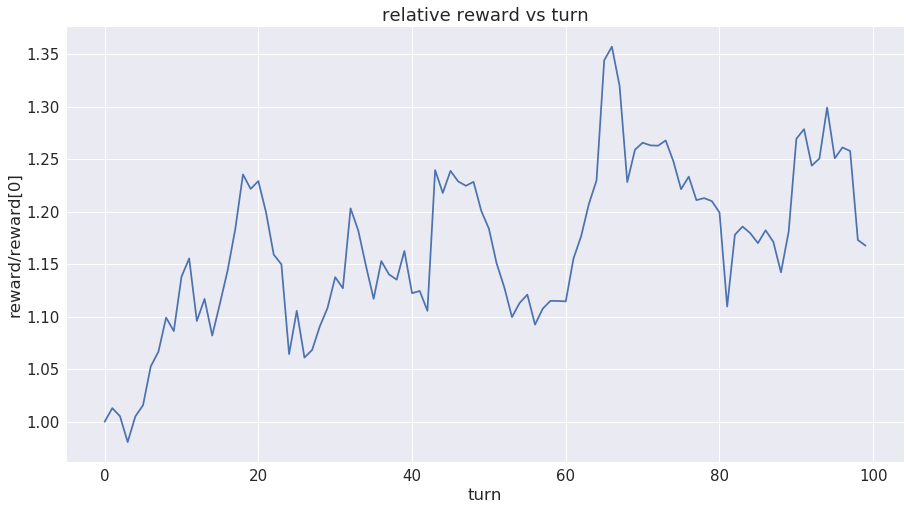

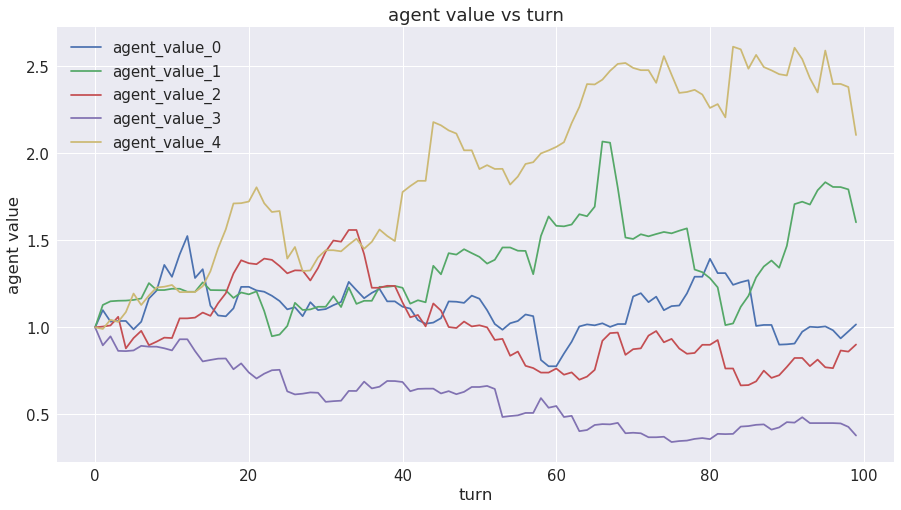

In [8]:
#plot relative reward versus turn, and agent values vs turn
df = game_history
xp = df['turn']
yp = df['reward']/df['reward'][0]
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('relative reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward/reward[0]')
p = ax.plot(xp, yp)
#plot agents value versus turn
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('agent value vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('agent value')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()

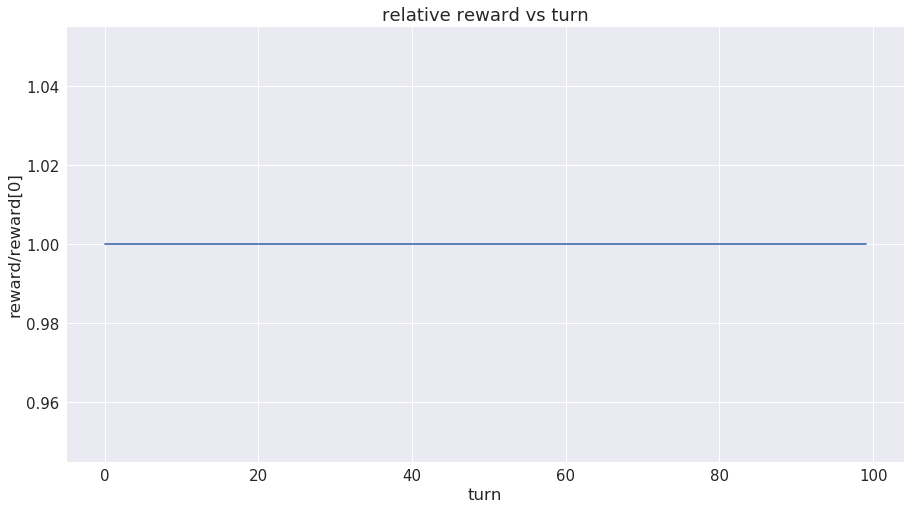

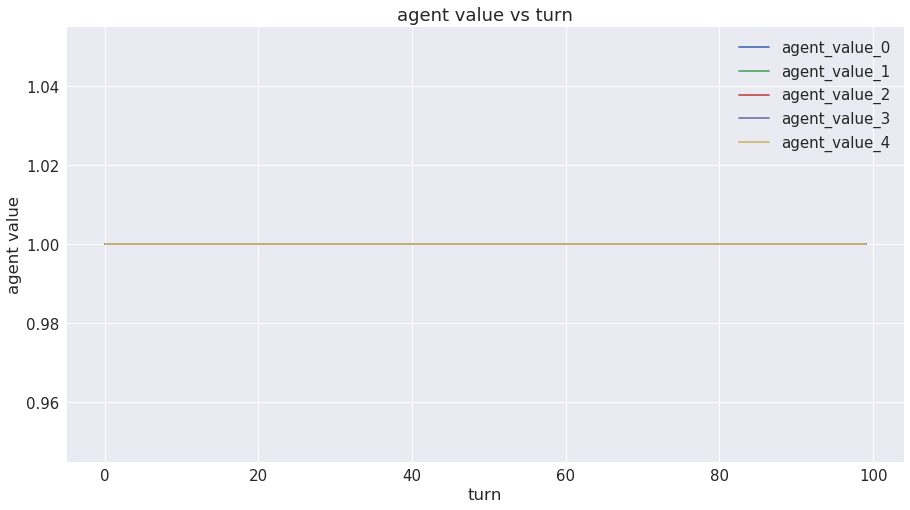

In [10]:
#play a low-risk, low-reward game with all agents sitting on bucket 1
turn = 0
strategy = '1'
memories = play_one_game(environment, turn, strategy)
game_history = memories2timeseries(memories, environment)
df = game_history
xp = df['turn']
yp = df['reward']/df['reward'][0]
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('relative reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward/reward[0]')
p = ax.plot(xp, yp)
#plot agents value versus turn
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('agent value vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('agent value')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()

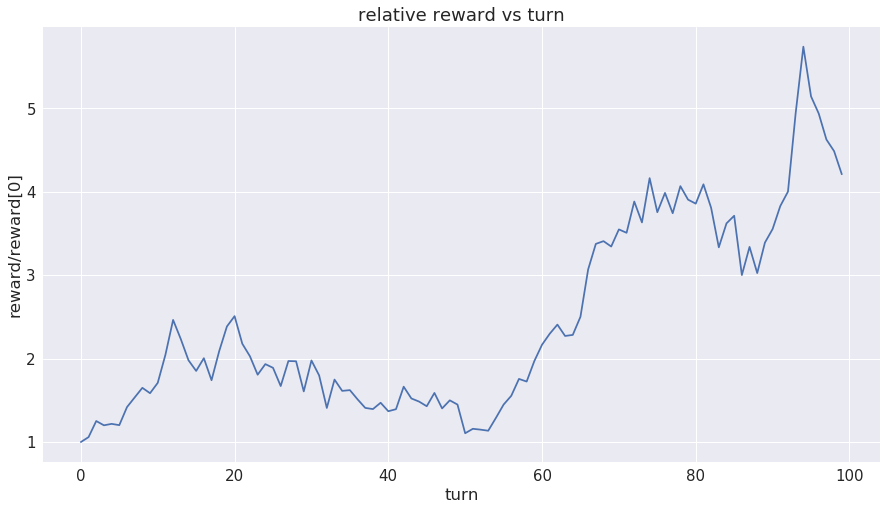

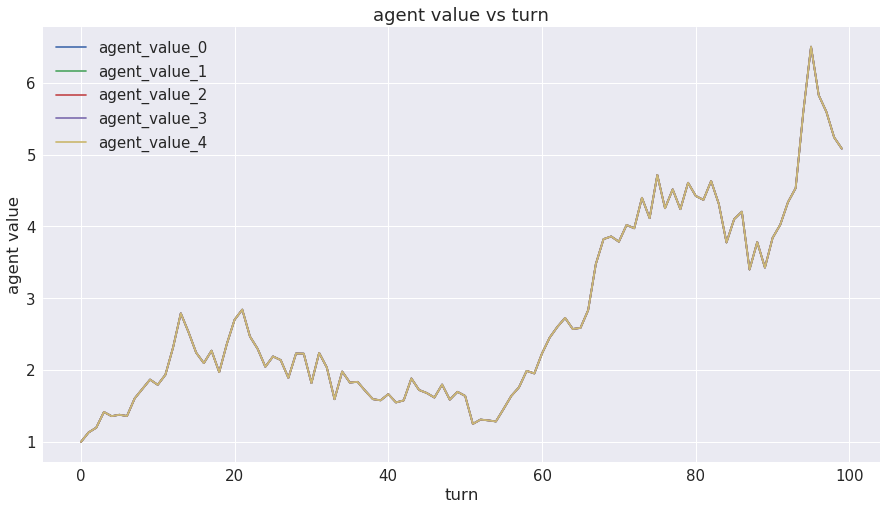

In [13]:
#play a high-risk, high-reward game with all agents sitting on bucket N_buckets - 1
turn = 0
strategy = str(N_buckets - 1)
memories = play_one_game(environment, turn, strategy)
game_history = memories2timeseries(memories, environment)
df = game_history
xp = df['turn']
yp = df['reward']/df['reward'][0]
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('relative reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward/reward[0]')
p = ax.plot(xp, yp)
#plot agents value versus turn
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('agent value vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('agent value')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()

In [ ]:
#play 10 games making random actions, and stash moves in memories queue
N_games = 5
strategy = 'random'
memories = play_N_games(environment, strategy, N_games)
print 'number of memories = ', len(memories)

In [ ]:
#build model
N_inputs = state_vector.shape[1]
N_outputs = N_buckets
N_neurons = N_inputs*N_outputs
model = build_model(N_inputs, N_neurons, N_outputs)
print model.summary()

In [ ]:
#train model
N_games = 20                               #number of games played during training
gamma = 0.85                                #discount for future rewards
batch_size = 100                             #number of memories used during experience-replay
debug = False                               #set True to see stats about each game's final turn
print 'batch_size = ', batch_size
print 'training model'
trained_model, game, rewards, epsilon = train(environment, model, N_games, gamma, memories, batch_size, debug=debug)
print '\ntraining done'

In [ ]:
#plot rewards vs training game
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = game
yp = rewards
p = ax.plot(xp, yp)
p = ax.set_title('reward vs training game')
p = ax.set_xlabel('game')
p = ax.set_ylabel('final reward')

In [ ]:
#plot epsilon vs game_number
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = game
yp = epsilon
p = ax.plot(xp, yp)
p = ax.set_title('epsilon vs game number')
p = ax.set_xlabel('game number')
p = ax.set_ylabel('epsilon')

In [ ]:
#play one smart game
strategy = 'smart'
memories = play_one_game(environment, turn, strategy, model=trained_model)
game_history = memories2timeseries(memories, environment)
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = game_history['turn']
yp = game_history['reward']
p = ax.plot(xp, yp)
p = ax.set_title('reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward')
game_history.head()

In [ ]:
#show grayscale of agent locations
cols = [col for col in game_history.columns if ('agents_' in col)]
df = game_history[cols]
fig, ax = plt.subplots(1,1, figsize=(15, 6))
plt.imshow(df.T, aspect='auto', cmap='gray')
df.tail(10)

In [ ]:
#plot bucket rewards versus turn
cols = ['turn'] + [col for col in game_history.columns if ('reward_' in col)]
df = game_history[cols].drop_duplicates()
cols = cols[1:]
fig, ax = plt.subplots(1,1, figsize=(15, 11))
p = ax.set_title('bucket rewards')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward')
p = ax.set_xlim(0, df['turn'].max() + 40)
for col in cols:
    p = ax.plot(df['turn'], df[col], alpha=0.8, linewidth=1, label=col)
p = ax.legend(loc='lower right')

In [ ]:
#done!
time_stop = time.time()
print 'execution time (minutes) = ', (time_stop - time_start)/60.0